# AT A GLANCE

1. Younger age population in the sample is more than older age population, as per Kernel Density Distribution in **Section 3 Distribution Plots**. Two bumps, a global maximum and an almost flat local minimum, indicate that most of the age groups are concentrated around the older and younger middle ages, respectively.

2. Most people have less than 5 auxiliary nodes, also inferred from **Section 3 Distribution Plots**. Also, from the same section, it is found that most people also survive after removal of nodes.

3. The hexagonal density plot in **Section 4.1 Viewing Density in Age VS Nodes** indicates that: *Overall, all age groups most had less than 10 nodes. Between 50 and 60, the number of nodes increased.*.

4. From **Section 6.1 Strip Plot**, correlation between Age VS Nodes shows: *It is mostly the middle ages that go through such a procedure. Extremely young or old are rare. However, correlation is seen as slightly strong, as observed from colouration scattering.* In order to understand if outliers are decreasing correlation, a box plot is drawn in **Section 6.2 Box Plot**, the observation of which is: *The outliers indicate a combination of factors are involved in a non-linear relationship, instead of a simple node and age relationship.*

5. According to **Section 6.2 Relational Plot** of Age VS Nodes with Colouration of Survival Status: *Early detection increases survival, at or preferably before early 40s.*

6. Looking at heat map in **Section 7 Again, Looking at Whole Dataset**, survival and node have medium correlation. This can be explained in two ways:

>a. Small dataset

>b. Medical intervention has positive correlation with survival, but damage induced by node has negative correlation with survival. Hence, the relationship between survival and node is not a straight-forward two-dimensional relationship.

**NOTE: For now, no *strong demarkation* has been observed for linear classification, due to limited factors included as columns in dataset. The demarkations found are slightly strong or medium correlation.**

# 1. Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
db = pd.read_csv("F:\EDGE\LecFiles\Lec7-20230825T093538Z-001\VERSION2_Lec7-20230825T180959Z-001\Lec7\ExploratoryDataAnalysis(EDA)-iris dataset notebooks\Exercise\haberman.csv.csv")

In [3]:
db.head()

,Age,Year,No.of Pos Axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
db.columns

Index(['Age', 'Year', 'No.of Pos Axillary nodes', 'Survival Status'], dtype='object')

# 2. Statistical Summary

In [5]:
db.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In case of mean and median values being very close in Age and Year, the data is likely to be slightly skewed. However, more charts are needed to make further observation.

In case of Number of Auxiliary Nodes and Survival Status, the data distribution looks extremely skewed.

# 3. Distribution Plots

As mentioned in **Section 2: Statistical Summary**, to understand the skewness of data, distribution needs to be observed.

<Axes: xlabel='Age', ylabel='Density'>

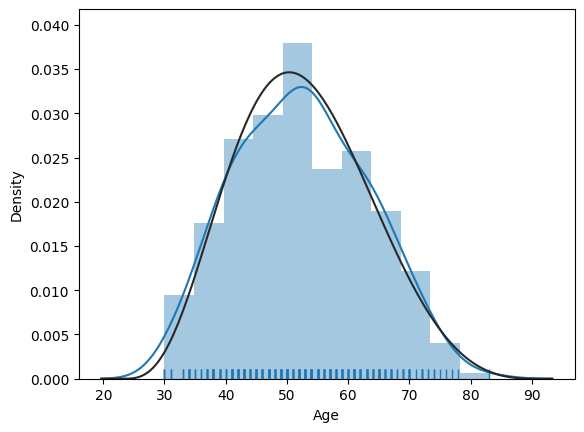

In [7]:
sns.distplot(db.Age, rug = True, fit = stats.gausshyper)

Younger age population in the sample is more than older age population.

<Axes: xlabel='No.of Pos Axillary nodes', ylabel='Density'>

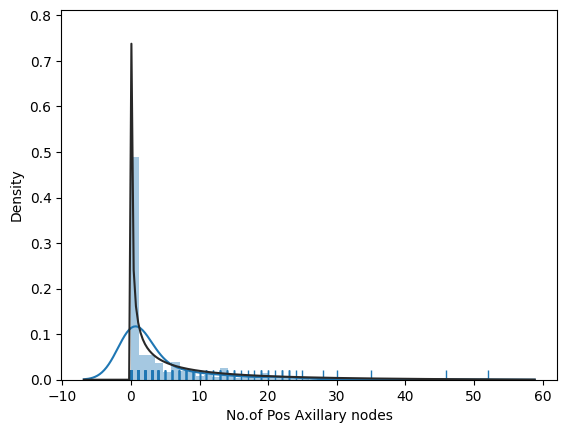

In [12]:
sns.distplot(db['No.of Pos Axillary nodes'], rug = True, fit = stats.gausshyper)

The greatest frequency seems to be 1 as the number of nodes.

<Axes: xlabel='Survival Status', ylabel='Density'>

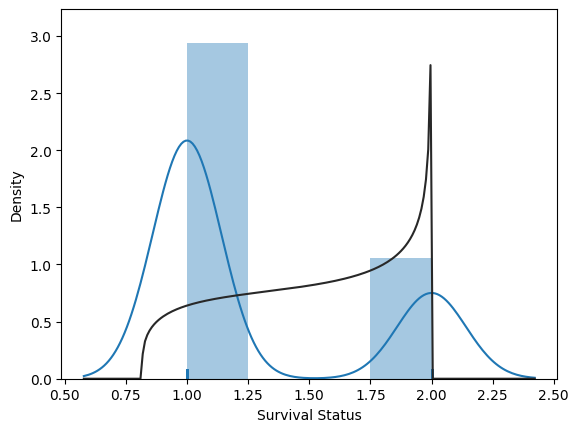

In [13]:
sns.distplot(db['Survival Status'], rug = True, fit = stats.gausshyper)

There are more people who survived.

# 4. Bivariate Distributions

The previous distributions have been 1 dimensional. In order to understand how independent variables such as age affect survival/the necessary medical procedures needed, we need a two dimensional comparision.

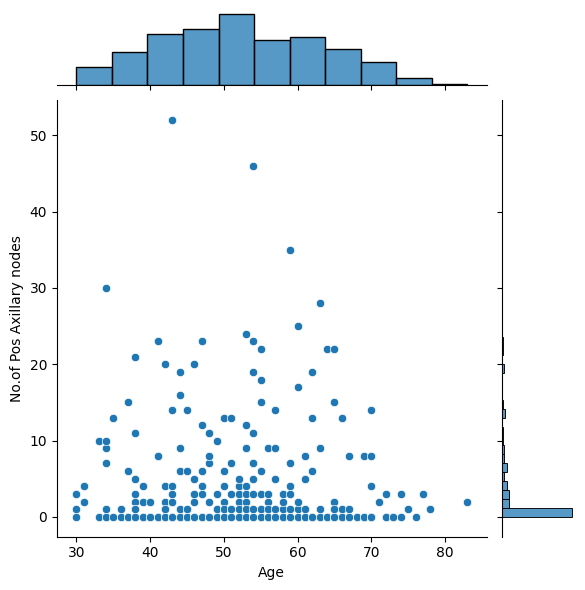

In [14]:
sns.jointplot(x = 'Age', y = 'No.of Pos Axillary nodes', data = db)

Overall, all age groups most had less than 10 nodes. Between 50 and 60, the nodes increased.

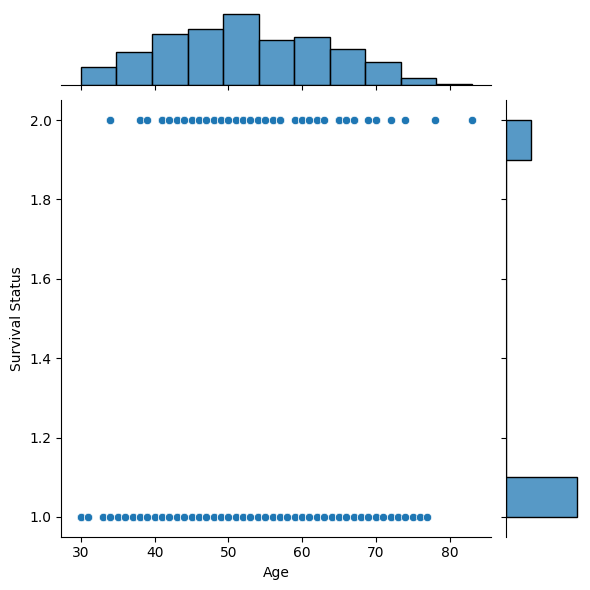

In [15]:
sns.jointplot(x = 'Age', y = 'Survival Status', data = db)

Age and survival status seem to be not correlated. However, only upon further statistical manipulation can such be concluded.

## 4.1 Viewing Density in Age VS Nodes

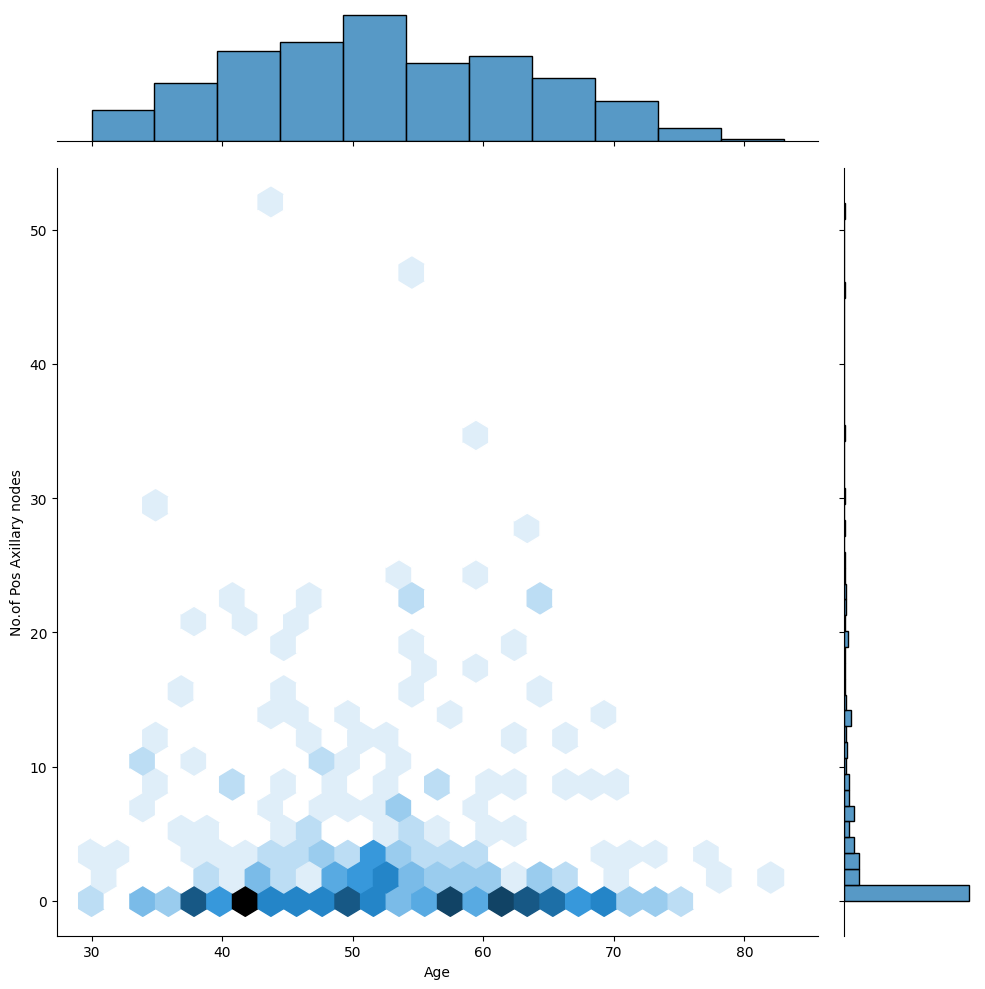

In [23]:
sns.jointplot(x = 'Age', y = 'No.of Pos Axillary nodes', data = db, kind = 'hex', height = 10)

A zoomed in view with `height = 10` confirms in hexplot our previous observations:

*Overall, all age groups most had less than 10 nodes. Between 50 and 60, the number of nodes increased.*

An particular darkness is observed within the 40 to 50 range, indicating an outlier.

## 4.2 Contour Map: Nodes VS Survival

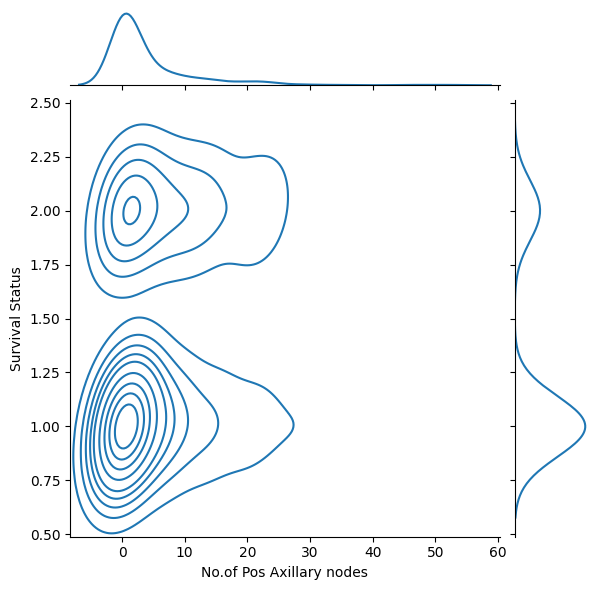

In [24]:
sns.jointplot(x = 'No.of Pos Axillary nodes', y = 'Survival Status', data = db, kind = 'kde')

There are no overlaps, indicating nodes and survival are mutually exclusive.

However, we do know that from the relevant medical literature, nodes are correlated to survival.

This is a key limitation in this project, owing to the bias of small numbers.

# 5. Summary after Initial Observations

A pairplot helps us to see any two dimensional pattern that we could have missed if we plot each variable manually.

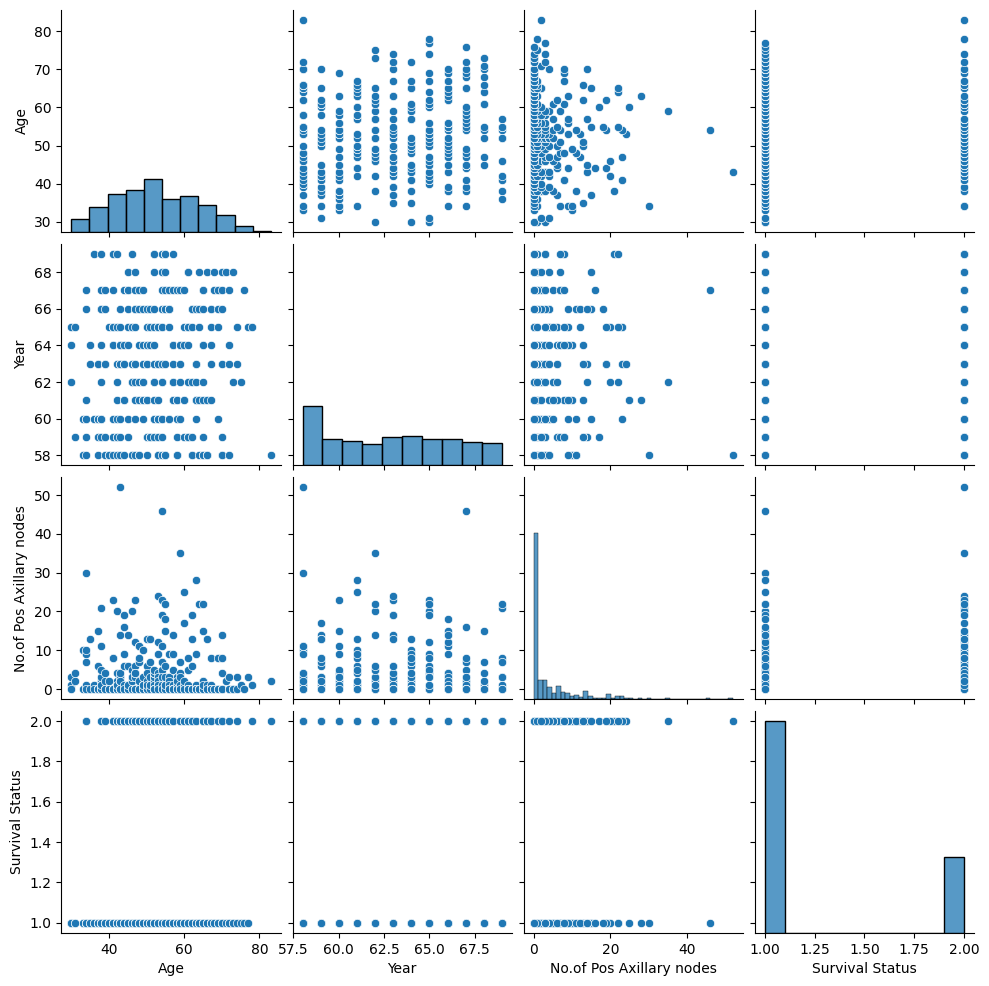

In [25]:
sns.pairplot(db)

These charts do not show any distinguishable characteristics required for classification.

# 6. Exploring Age VS Nodes Further

## 6.1 Strip Plot

Due to no **very strong** correlation, a strip plot of age VS nodes is being plotted to find out a definite correlation. Our previous **slightly strong** correlation is being further observed:

<Axes: xlabel='No.of Pos Axillary nodes', ylabel='Age'>

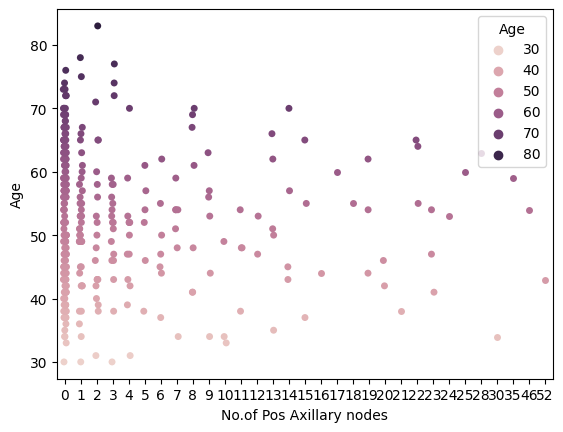

In [34]:
sns.stripplot(y = 'Age', x = 'No.of Pos Axillary nodes', data = db, hue = 'Age')

From the colouration, it is mostly the middle ages that go through such a procedure. Extremely young or old are rare. However, correlation is still seen as slightly strong.

## 6.2 Box Plot

It is important to see if outliers are causing slightly strong correlation.

<Axes: xlabel='Age', ylabel='No.of Pos Axillary nodes'>

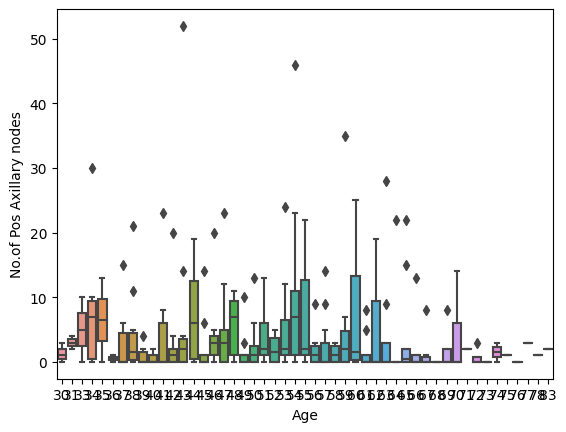

In [45]:
sns.boxplot(y = 'No.of Pos Axillary nodes', x = 'Age', data = db)

The outliers indicate a combination of factors are involved in a non-linear relationship, instead of a simple node and age relationship.

## 6.3 Relational Plot

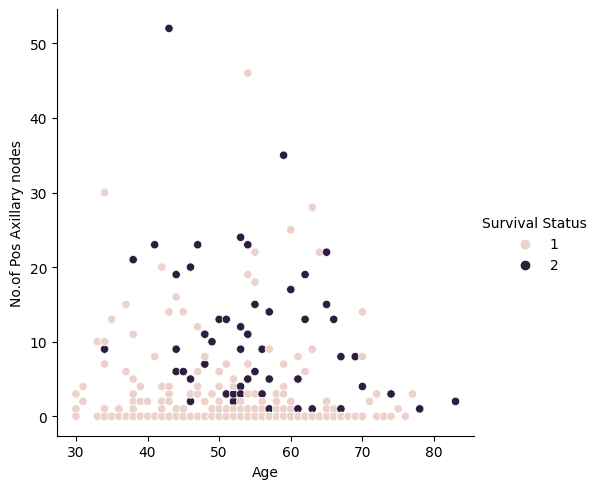

In [52]:
sns.relplot(y = 'No.of Pos Axillary nodes', x = 'Age', data = db, hue = 'Survival Status')

A relational plot shows that early detection increases survival, at or preferably before early 40s.

# 7. Again, Looking at Whole Dataset

<Axes: >

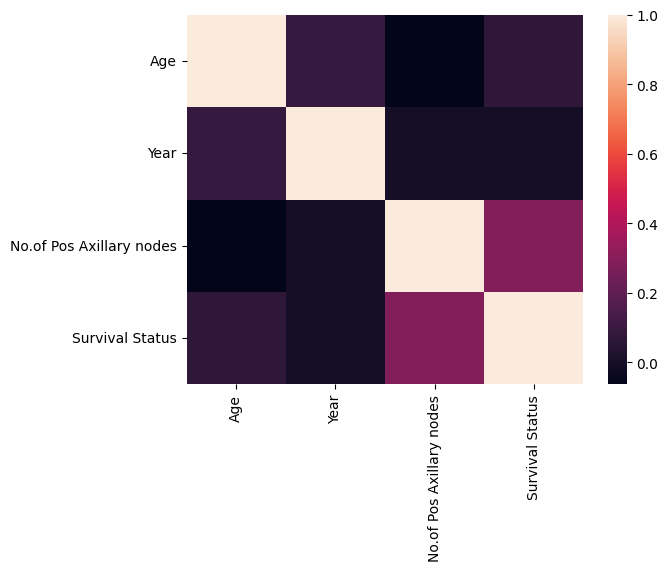

In [53]:
# sns.heatmap(db.corr(), cmap='YlGnBu', linecolor='white', linewidths=1)
sns.heatmap(db.corr())

Referring back to **Section 4.2 Contour Map: Nodes VS Survival**, where no overlapping suggested nodes are not correlated to survival (*although the medical literature says such correlation exists*), further evidence to support comes from slightly weak correlation in pink above.

GitHub: https://github.com/AsfariaChowdhury/LearningAI/issues/15